# Initial Exploratory Analysis


The following notebook covers the inital merge of the Melbourne AirBnB data, originally made available on [Inside Airbnb](http://insideairbnb.com/get-the-data.html), and downloaded for this analysis from [kaggle](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data "Original Data"). 

In 2016, Melbourne was found to be the 6th most popular city for Airbnb users, globally. On the 7th of Decemeber, 2018 these data sets, describing the listing activity in Melbourne, were then compiled as a part of the InsideAirbnb initiative.

The following content description is taken from the [kaggle data description page](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data) for the data sets.

>The following Airbnb activity is included in this Melbourne Airbnb dataset:
>
>* Listings: detailed listings data including full descriptions and average review score
>* Calendar: detailed calendar data for listings, including listing id and the price and availability for that day
>* Reviews, detailed review data for listings including unique id for each reviewer and detailed comments
>* Listings-Summary: summary information and metrics for listings (good for visualisations)
>* Reviews-Summary: summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)
>* Neigborhoods: neighborhood list for geo filter. Sourced from city or open source GIS files

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from re import sub

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

* * *

## Data Import

In [4]:
data_calendar = pd.read_csv("Data/calendar_dec18.csv")
data_cleansed_listings = pd.read_csv("Data/cleansed_listings_dec18.csv")
data_list_sum = pd.read_csv("Data/listings_summary_dec18.csv")
data_reviews = pd.read_csv("Data/reviews_dec18.csv")

/home/anna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


* * *

### Scraped listings for the Airbnb listings from the Airbnb site - data_cleansed_listings

This data set includes information on the reviews, description, listing name, host, and listing id for the Melbourne Airbnb listings.

In [5]:
#first 5 rows of data frame
pd.set_option('display.max_columns', None)
data_cleansed_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,https://a0.muscache.com/im/pictures/44620/5a58...,33057,https://www.airbnb.com/users/show/33057,Manju,8/21/2009,AU,About us: We are an East Indian couple in our ...,a few days or more,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,"Bulleen, Australia",AU,Australia,-37.772684,145.092133,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN,NaN,NaN,1,22,1,365,17 months ago,t,30,60,90,365,12/7/2018,4,5/24/2011,9/12/2015,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,https://a0.muscache.com/im/pictures/31323790/9...,38901,https://www.airbnb.com/users/show/38901,Lindsay,9/16/2009,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,NaN,NaN,f,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,"Brunswick East, Australia",AU,Australia,-37.766505,144.980736,t,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0,0.0,9.0,1,15,3,45,6 weeks ago,t,4,9,33,213,12/7/2018,108,1/12/2013,11/26/2018,87.0,9.0,8.0,9.0,9.0,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is

In [6]:
print("There are {} listings and {} features in this data frame".format(data_cleansed_listings.shape[0], data_cleansed_listings.shape[1]))
print("There are {} diferent types of properties, and {} different types of rooms.".format(len(data_cleansed_listings["property_type"].unique()), len(data_cleansed_listings["room_type"].unique())))
print("These different listings are found in {} different neighbourhoods around Melbourne, such as {}...".format(len(data_cleansed_listings["neighborhood"].unique()), ", ".join(data_cleansed_listings["neighborhood"].unique()[0:5])))

There are 22895 listings and 84 features in this data frame
There are 35 diferent types of properties, and 3 different types of rooms.
These different listings are found in 60 different neighbourhoods around Melbourne, such as Balwyn North, Brunswick, St Kilda, Thornbury, St Kilda East...


Text(0.5, 1, 'Missing Values in the Cleansed Listings Data')

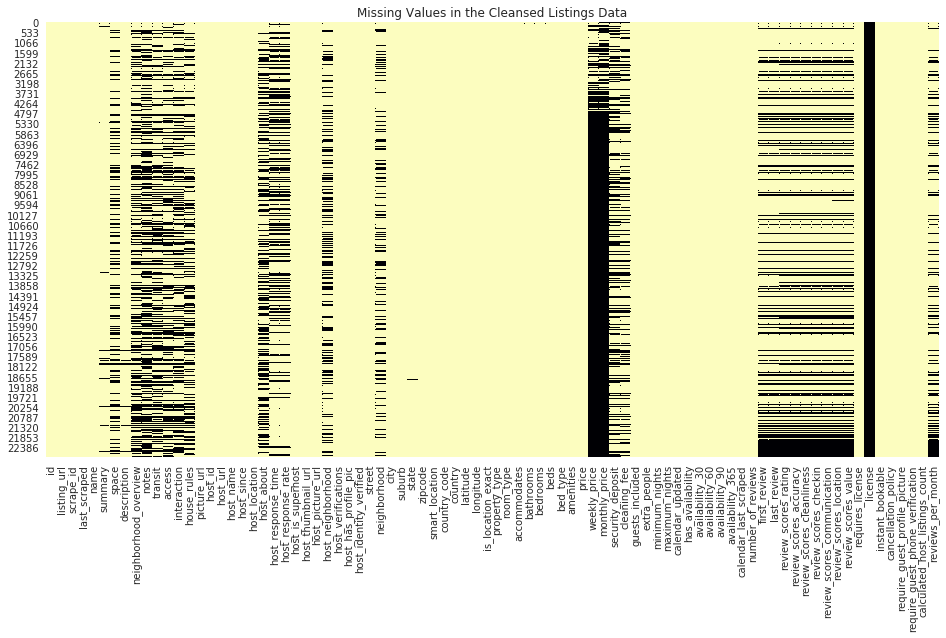

In [7]:
#Heatmap showing the missing values in the date frame
plt.figure(figsize = (16,8))
sns.heatmap(data_cleansed_listings.isna(), cmap = "magma_r", cbar = False)
plt.title("Missing Values in the Cleansed Listings Data")

**Missing Review**

* As, at a cursory glance, license appears to entirely null, I'll be dropping it from the data frame.

* weekly_price and monthly_price are also largely null, but I'll be using the values which aren't null to determine what, if any discount is usually given when a guest books on a weekly or monthly basis, rather than on a nightly one. After determining these rates, I'll drop these variables. 

In [8]:
#dropping license
data_cleansed_listings.drop(columns=["license"], inplace=True)

* * *

In [9]:
data_cleansed_listings["price"].describe()

count    22895.000000
mean       148.004368
std        210.883253
min          0.000000
25%         71.000000
50%        111.000000
75%        165.000000
max      12624.000000
Name: price, dtype: float64

In [10]:
data_cleansed_listings["price"].groupby(data_cleansed_listings["room_type"]).describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,14379.0,189.149385,228.391190,0.0,109.0,145.0,199.0,12624.0
Private room,8116.0,79.978807,157.445309,0.0,48.0,60.0,80.0,9000.0
Shared room,400.0,49.182500,54.266300,0.0,25.0,35.0,50.0,550.0


In [11]:
#All prices
print("When considering all price observations, regardless of the host having provided weekly or monthly prices:\n")
print("There is, on average, a {}% discount when booking a property by the week instead of by the night.\n".format(round((1 - data_cleansed_listings["weekly_price"].mean()/(7*data_cleansed_listings["price"].mean()))*100, 2)))
print("There is, on average, a {}% discount when booking by the month instead of by the night.\n\n".format(round((1 - data_cleansed_listings["monthly_price"].mean()/(30*data_cleansed_listings["price"].mean()))*100, 2)))

#only those prices where a host provided info on weekly and monthly price
print("When considering only those price observations where the host also provided weekly or monthly prices:\n")
print("There is, on average, a {}% discount when booking a property by the week instead of by the night.\n".format(round((1 - data_cleansed_listings["weekly_price"].mean()/(7*data_cleansed_listings[data_cleansed_listings["weekly_price"].notnull()]["price"].mean()))*100, 2)))
print("There is, on average, a {}% discount when booking by the month instead of by the night.".format(round((1 - data_cleansed_listings["monthly_price"].mean()/(30*data_cleansed_listings[data_cleansed_listings["monthly_price"].notnull()]["price"].mean()))*100, 2)))


When considering all price observations, regardless of the host having provided weekly or monthly prices:

There is, on average, a 12.46% discount when booking a property by the week instead of by the night.

There is, on average, a 27.16% discount when booking by the month instead of by the night.


When considering only those price observations where the host also provided weekly or monthly prices:

There is, on average, a 11.71% discount when booking a property by the week instead of by the night.

There is, on average, a 25.96% discount when booking by the month instead of by the night.


In [12]:
data_cleansed_listings.drop(columns=["weekly_price", "monthly_price"], inplace = True)
data_cleansed_listings.reset_index(drop = True, inplace = True)

Text(0, 0.5, 'Minnimum Night Stay')

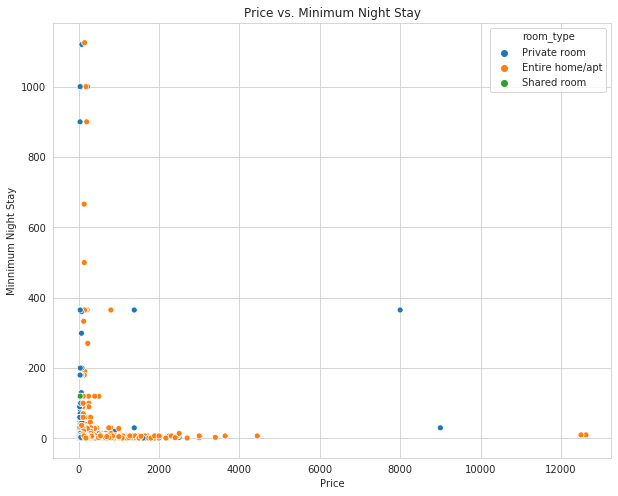

In [13]:
#Scatter plot of listing price against minimum night requirement
plt.figure(figsize = (10,8))
sns.scatterplot(data_cleansed_listings["price"], data_cleansed_listings["minimum_nights"], hue = data_cleansed_listings["room_type"] )
plt.title("Price vs. Minimum Night Stay")
plt.xlabel("Price")
plt.ylabel("Minnimum Night Stay")

One would expect some sort of decaying relationship between the price and the minimum night stay requirement (ie as the number of nights increases, the price should slowly decrease until it reaches some sort of plateau where it is no longer financially sensible to decrease the price, regardless of the length of the stay) there are some obvious points of concern in this data set. 

It appears that some listings have chosen an arbitrarily high number of minimum nights while still maintaing a low price (shown in red in the above plot). In most cases is appears that the "price" feature is, at least somewhat related to the minimum night stay, in these cases that dependancy is completely ignored. 

As the data only refelects the avaliability/bookings for the next year, I'll be dropping all listings which have a minimum booking requirement greater than one year. Lets do so and regenerate the above plot.

In [14]:
#Only retain listings with mini stays less than a year
data_cleansed_listings = data_cleansed_listings[data_cleansed_listings["minimum_nights"] <= 365]

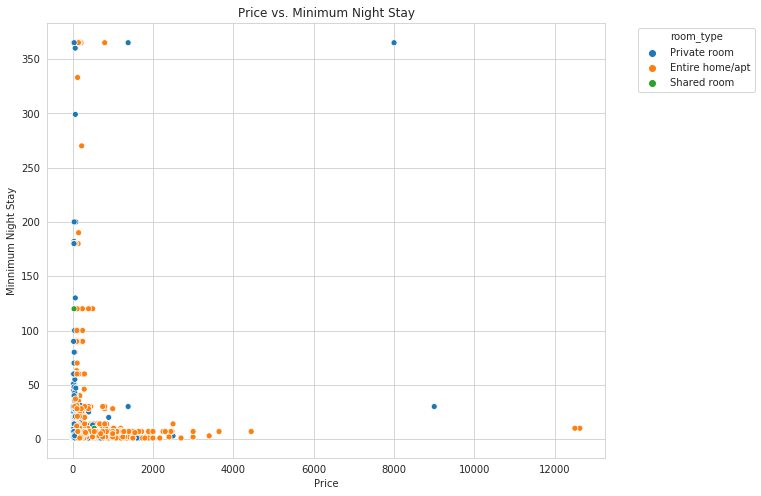

In [15]:
#Scatter plot of listing price against minimum night requirement (Less than 1 year)
plt.figure(figsize = (10,8))
sns.scatterplot(data_cleansed_listings["price"], data_cleansed_listings["minimum_nights"], hue = data_cleansed_listings["room_type"] )
plt.title("Price vs. Minimum Night Stay")
plt.xlabel("Price")
plt.ylabel("Minnimum Night Stay")

#Moving the Legend out of the plot
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

There are two listings with high minimum stay requirements which are priced at approximately \\$1,000, flat out. These listing seem to be exhibiting unexpected behavior. There is a possibility that these properties actually are worth about \\$1,000 per night, but I want to review them to see if they have merely been set at both an arbitrarily high price and minimum night stay to disuade guests. I'll refer to these as the "Medium" listings below.

On the other end of the spectrum, there are four very highly priced listings. As there are only 3 high priced - low stay and 1 high priced - high stay listings, so I'll review these first.

#### High Priced Listings

In [16]:
data_cleansed_listings[data_cleansed_listings["price"] > 7900]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
5636,12719024,https://www.airbnb.com/rooms/12719024,2.018120e+13,12/7/2018,"Tidy, pet friendly on request","Close to Train, Tram, Bikepaths. 13km from Mel...",NaN,"Close to Train, Tram, Bikepaths. 13km from Mel...",NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/43ef7cc1-4...,69151339,https://www.airbnb.com/users/show/69151339,Shae,4/27/2016,Australia,After a recent tragedy I have taken 12 months ...,NaN,NaN,f,https://a0.muscache.com/im/pictures/3b53dbc7-e...,https://a0.muscache.com/im/pictures/3b53dbc7-e...,NaN,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Reservoir, VIC, Australia",Preston,Darebin,Reservoir,VIC,3073,"Reservoir, Australia",AU,Australia,-37.724889,144.997307,t,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",12624,NaN,NaN,1,0,10,100,18 months ago,t,0,0,0,0,12/7/2018,1,4/30/2016,4/30/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,0.03
7872,16181637,https://www.airbnb.com/rooms/16181637,2.018120e+13,12/7/2018,Nice accommodation in Kew east,We are young couples and our unit is near the ...,NaN,We are young couples and our unit is near the ...,NaN,NaN,NaN,NaN,NaN,We offer breakfast for the guests! But we can'...,https://a0.muscache.com/im/pictures/790c8a99-c...,105660264,https://www.airbnb.com/users/show/105660264,Jiahong,11/30/2016,"Kew East, Victoria, Australia",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/a5300dd5-c...,https://a0.muscache.com/im/pictures/a5300dd5-c...,NaN,"['email', 'phone', 'facebook', 'reviews']",t,f,"Kew East, VIC, Australia",Kew,Boroondara,Kew East,VIC,3102,"Kew East, Australia",AU,Australia,-37.785660,145.062014,f,Townhouse,Private room,2,1.0,1.0,2.0,Real Bed,"{""translation missing: en.hosting_amenity_49"",...",8000,NaN,NaN,1,0,365,1125,25 months ago,t,0,0,0,0,12/7/2018,1,3/18/2018,3/18/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,0.11
8119,16359110,https://www.airbnb.com/rooms/16359110,2.018120e+13,12/7/2018,VERVE APARTMENT SHORT TERM ACCOMDATION,"我的房源靠近Queen Victoria Market ,RMIT, UNIMELB, AL...",NaN,"我的房源靠近Queen Victoria Market ,RMIT, UNIMELB, AL...",NaN,NaN,NaN,NaN,NaN,"- KEEP QUIET AFTER 11PM, TAKE OFF SHOES BEFORE...",https://a0.muscache.com/im/pictures/eb142034-0...,107127376,https://www.airbnb.com/users/show/107127376,Jesse,12/13/2016,CN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/772fd683-1...,https://a0.muscache.com/im/pictures/772fd683-1...,Central Business District,"['email', 'phone']",t,f,"Melbourne, VIC, Australia",Central Business District,Melbourne,Melbourne,VIC,3000,"Melbourne, Australia",AU,Australia,-37.806440,144.962038,t,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,Gym,Elev...",9000,NaN,NaN,1,0,30,1125,18 months ago,t,30,60,90,365,12/7/2018,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,t,

With respect to the hig priced - low stay listings:
* The two more expensive are entire houses, both requiring a 10 night stay minimum. The more expensive of the two (\\$12,624) is located in Reservoir, while the other (\\$12,501) is in Berwick (a much more distantly located suburb). The Reservoir house is a 2-bedroom, while the Berwick house is  3-bedroom, with 2 and 4 beds respectively, and both house accommodate 4 people. The Reservoir house has no availability inn the next year, while the Berwick house is available for a total of 177 days in the year.

* The least expensive of the three (\\$9,000) is a private room in an appartment in the Central Business District, and requires a 30 day stay and accommodates 2. This listing is available for the entire year.

With respect to the high priced - high stay listing:
* This listing (\\$8000) is a private room in a townhouse, located in Kew East. The minimum booking time is 365 days, but there is no avaliablity for the next year.

#### "Medium" Listings

In [17]:
data_cleansed_listings[(data_cleansed_listings["price"] > 750) & (data_cleansed_listings["minimum_nights"] == 365) & (data_cleansed_listings["price"] < 2000)]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighborhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighborhood,city,suburb,state,zipcode,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
5740,12910225,https://www.airbnb.com/rooms/12910225,2.018120e+13,12/7/2018,near boxhill& doncaster beautiful private room,我的房源适合情侣､孤独的冒险家､商务旅行者､家庭(带孩子)｡,NaN,我的房源适合情侣､孤独的冒险家､商务旅行者､家庭(带孩子)｡,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/1d42945c-1...,19776914,https://www.airbnb.com/users/show/19776914,Corinna,8/10/2014,"Melbourne, Victoria, Australia",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/19776914/prof...,https://a0.muscache.com/im/users/19776914/prof...,NaN,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Mont Albert North, VIC, Australia",Balwyn North,Whitehorse,Mont Albert North,VIC,3129,"Mont Albert North, Australia",AU,Australia,-37.800124,145.110075,f,House,Private room,5,1.0,1.0,4.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Fami...",1383,208.0,7.0,1,35,365,1125,31 months ago,t,27,57,87,362,12/7/2018,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
13540,21940356,https://www.airbnb.com/rooms/21940356,2.018120e+13,12/7/2018,NO LONGER AVAILABLE eclectic Northcote,NO LONGER AVAILABLE,Fantastic 80sq metre apartment with small outd...,NO LONGER AVAILABLE Fantastic 80sq metre apart...,(Website hidden by Airbnb) (Website hidden b...,NaN,"Bikes are very popular in Northcote, but publi...",Completely self contained 2 bedroom ground flo...,NaN,NaN,https://a0.muscache.com/im/pictures/23a94e81-4...,891832,https://www.airbnb.com/users/show/891832,Rita,7/30/2011,"Melbourne, Victoria, Australia","retired, always travelling the world or lookin...",NaN,NaN,f,https://a0.muscache.com/im/users/891832/profil...,https://a0.muscache.com/im/users/891832/profil...,Northcote,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Northcote, VIC, Australia",Northcote,Darebin,Northcote,VIC,3070,"Northcote, Australia",AU,Australia,-37.772106,144.998408,t,Apartment,Entire home/apt,4,1.0,2.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",800,0.0,60.0,2,20,365,740,8 months ago,t,23,53,83,358,12/7/2018,5,12/6/2017,12/19/2017,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,strict_14_with_grace_period,f,f,1,0.41


In [18]:
amenities = data_cleansed_listings.iloc[5740, 49]
print("The amenities for the first listing are: {}".format(amenities))

The amenities for the first listing are: {TV,Internet,Wifi,"Air conditioning",Kitchen,"Free parking on premises","Pets allowed",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}


The first, and less expensive, of these two listings ia a private room in a house which accomodates 5, and claims that it can fit an extra 35 people. No one has ever stayed at this listing, and although it requires a minimum 365 night stay, there are only 362 nights avaliable in the upcoming year. The above listed amenities do not seem to provide an explanation for the high listing price. I'll be removing this listing as an outlier.

The second listing is marked throughout all description sections as being no longer available. I'll be removing this listing as well.

In [19]:
outliers = []
ids = (data_cleansed_listings[(data_cleansed_listings["price"] > 750) & (data_cleansed_listings["minimum_nights"] == 365) & (data_cleansed_listings["price"] < 2000)]["id"].get_values())
for el in ids:
    outliers.append(el)
outliers

[12910225, 21940356]

In [20]:
data_cleansed_listings.drop(index = [5740, 13540], inplace=True)

#### Further Analysis of the Above Plot - Zooming in on the left corner

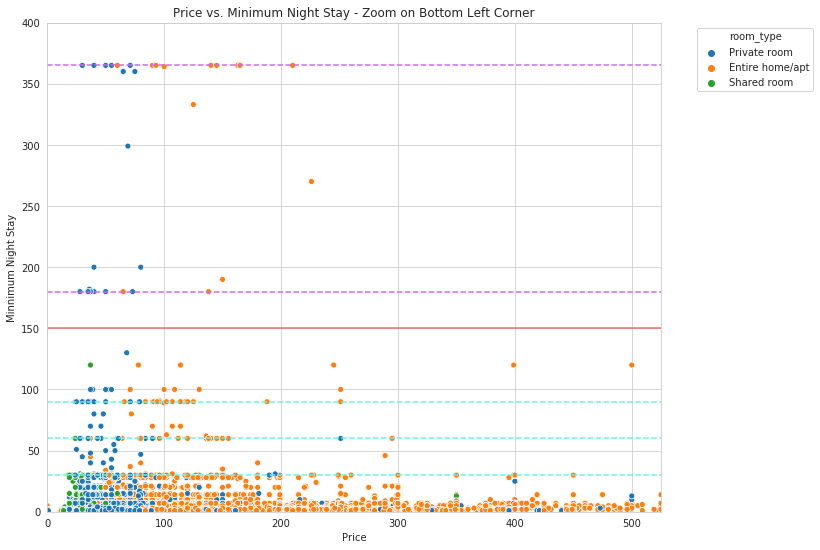

In [21]:
#Scatter plot of listing price against minimum night requirement
plt.figure(figsize = (11,9))
sns.scatterplot(data_cleansed_listings["price"], data_cleansed_listings["minimum_nights"], hue = data_cleansed_listings["room_type"] )
plt.title("Price vs. Minimum Night Stay - Zoom on Bottom Left Corner")
plt.xlabel("Price")
plt.ylabel("Minnimum Night Stay")

#Moving the Legend out of the plot
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

#Limiting the axes to zoom on the lower left corner
plt.xlim(left = 0,right = 525)
plt.ylim(bottom = 0, top = 400)

#adding the divding red line for the large break
plt.hlines(y = 150, color = "#F26A68", xmin = 0, xmax = 525)

#Adding the 6 month and 1 year trend lines
plt.hlines(y = 180, color = "#D168F2", xmin = 0, xmax = 525, linestyles = "dashed")
plt.hlines(y = 365, color = "#D168F2", xmin = 0, xmax = 525, linestyles = "dashed")

#adding the 1, 2, and 3 month trend lines
plt.hlines(y = 90, color = "#68F2E4", xmin = 0, xmax = 525, linestyles = "dashed")
plt.hlines(y = 60, color = "#68F2E4", xmin = 0, xmax = 525, linestyles = "dashed")
plt.hlines(y = 30, color = "#68F2E4", xmin = 0, xmax = 525, linestyles = "dashed")

When examining the lower left corner of the plot show in interaction between the price and the minimum night stay, there is clear break between listings with a minimum night stay of more than 150 nights, and those with a minimum stay of less than 150 nights. These two general groups are divided by the red line in the plot above.

* In the upper section of the plot, as deliminated by the red line, two groupings of listings can be seen. These correspond to listings set with a minimum stay of 6 months or one year (180 or 365 days). These two groups ae marked with purple trend lines.

* In the lower section of the plot, as deliminated by the red line, three clear groupings of listings can be seen. These correspond to where the host has selected either 1, 2, or 3 months (30, 60, or 90 days) as the default minimum stay. These three groupings are marked by the dashed cyan lines.

At this point I've spent some time analyzeing the data set as a whole, as I wanted to keep as many observations in any analysis set I would generate, but I have a serious issue with the information I'm gathering from the two above plots (the full and zoomed version of the interaction of price and minimum stay). 

There are simply too many point which I would say are displaying illogical or unexplainable behavior. I can think of far too many reasons for a host to provide an arbitrarily long minimum stay while provided a low, or average price. This inserts too much randomness into the price feature, for which I cannot easily, functionally account. I've tried multiple methods for adjusting the price to match what the host could have intended for a nightly price, but there are simply too many underlying motivations.

As such, I'm going to review the data and see just what percentage of the listings have long minimum stay requirements. 

Text(0, 0.5, 'Number of Listings')

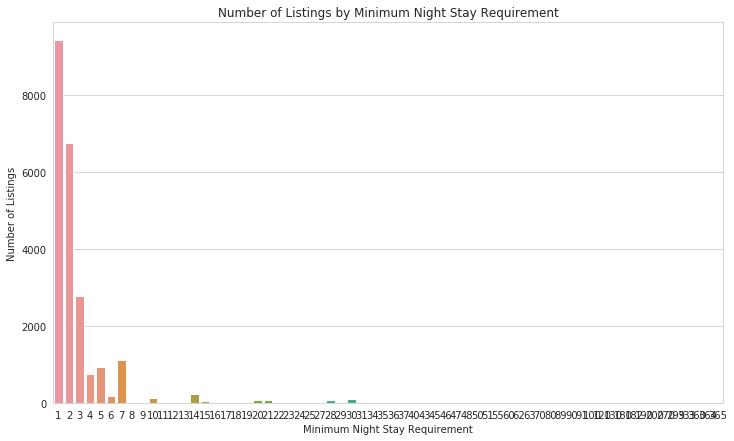

In [22]:
#bar chart showing number of listings for each minimum stay level
plt.figure(figsize = (12,7))
sns.countplot(data_cleansed_listings["minimum_nights"])
plt.title("Number of Listings by Minimum Night Stay Requirement")
plt.xlabel("Minimum Night Stay Requirement")
plt.ylabel("Number of Listings")

In [23]:
#Calculating percentage of listings with minimum_stay<=3
print("Of the total {} listings, {}% of them have minimum stay requirements of 3 nights or less.".format(len(data_cleansed_listings),round((len(data_cleansed_listings[data_cleansed_listings["minimum_nights"] <= 3])/len(data_cleansed_listings))*100, 2)))

Of the total 22881 listings, 82.81% of them have minimum stay requirements of 3 nights or less.


Since such a large amount of the data set have minimum stay requirements of 3 days or less, I'll be dropping all listings with with longer stay requirements longer than that. 

In [24]:
data_cleansed_listings = data_cleansed_listings[data_cleansed_listings["minimum_nights"] <= 3]
data_cleansed_listings.reset_index(drop = True, inplace = True)

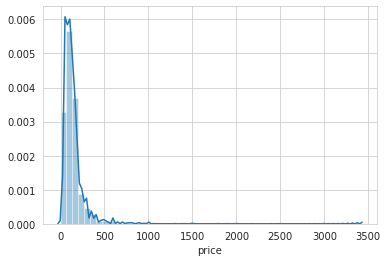

In [25]:
sns.distplot(data_cleansed_listings["price"])

Text(0, 0.5, 'Price')

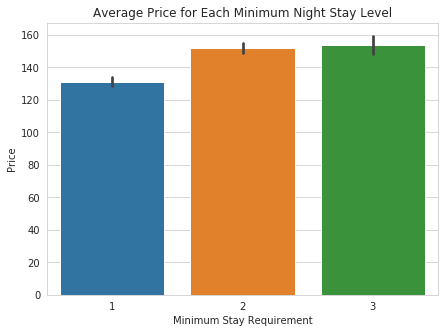

In [27]:
#Average price for each level of minimum night stay
plt.figure(figsize = (7,5))
sns.barplot(data_cleansed_listings["minimum_nights"], data_cleansed_listings["price"])
plt.title("Average Price for Each Minimum Night Stay Level")
plt.xlabel("Minimum Stay Requirement")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

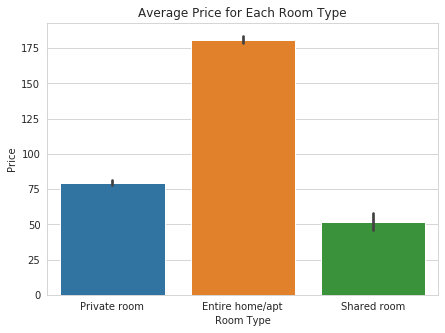

In [28]:
#Average price for room type
plt.figure(figsize = (7,5))
sns.barplot(data_cleansed_listings["room_type"], data_cleansed_listings["price"])
plt.title("Average Price for Each Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")

As one may have expected, the lowest average price is for the shared room listings, while entire homes/appartments are notable more expensive thatn the other two listing types.

Text(0, 0.5, 'Number of Listings')

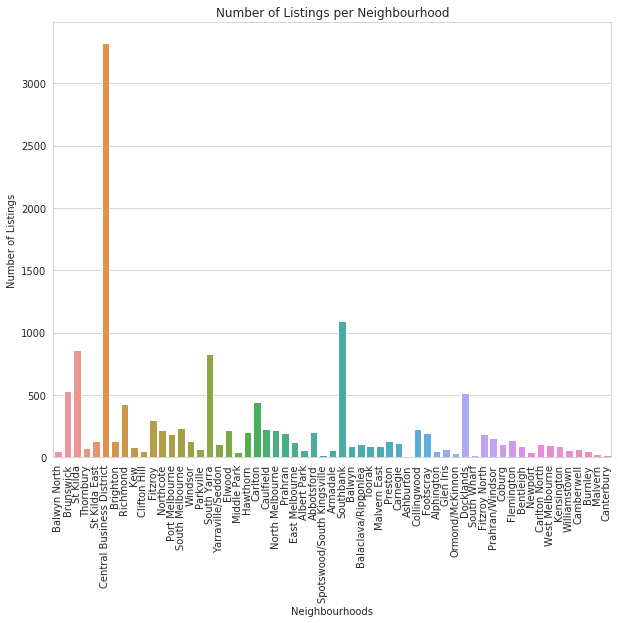

In [29]:
#Bar plot of Number of Listings by Neightborhood
plt.figure(figsize = (10, 8))
sns.countplot(data_cleansed_listings["neighborhood"])
plt.title("Number of Listings per Neighbourhood")
plt.xticks(rotation = "vertical")
plt.xlabel("Neighbourhoods")
plt.ylabel("Number of Listings")

Text(0.5, 0, 'Neighbourhood')

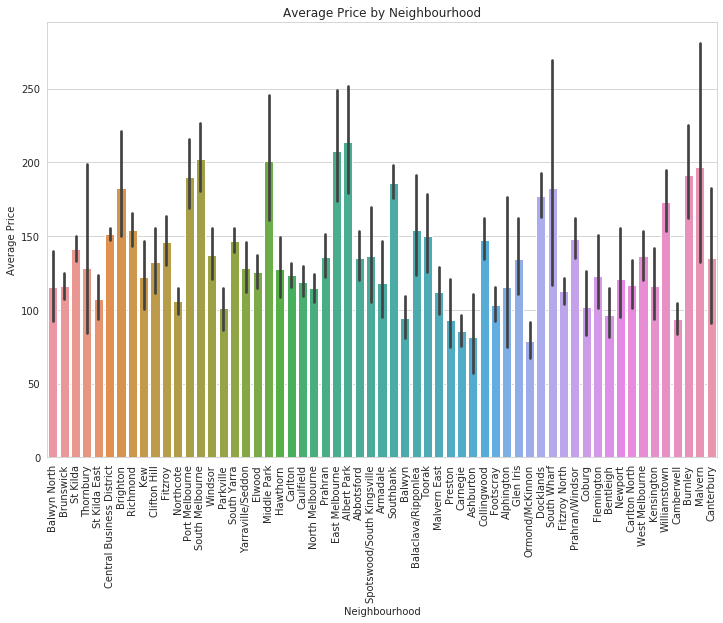

In [30]:
#Bar plot of average prices by neighbourhood
plt.figure(figsize = (12,8))
sns.barplot(data_cleansed_listings["neighborhood"], data_cleansed_listings["price"])
plt.xticks(rotation = "vertical")
plt.title("Average Price by Neighbourhood")
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood")

As the black bars in the above plot indicate the variance of the price for each neigbourhood, it is clear to see that some neighbourhoods average listing price varies quite notably. Specifically, Kew, Armadale, Preston, and Malvern all have extrememly high variances in the prices for the different listings. 

In [31]:
data_cleansed_listings.to_csv("Data_out/cleansed_listings_update.csv")

### Detailed Calendar Data for the December 2018 Melbourne Listings - data_calendar

This data frame has 4 variables:
* listing_id: The Listing Id from AirBnB site
* date: The dates for the next year
* available: If the listing is avaliable on the given date
* price: The price for that data, if available

In [32]:
data_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [33]:
data_calendar["listing_id"].astype("category").describe()

count      8356675
unique       22895
top       30593623
freq           365
Name: listing_id, dtype: int64

There are 22,895 unique listing ids in this data set. 

In [34]:
#Converting data types too more useable formats

#Date to datetime
data_calendar["date"] = pd.to_datetime(data_calendar["date"])

#Avaliable to True/False
data_calendar.loc[data_calendar["available"] == "t", "available"] = True
data_calendar.loc[data_calendar["available"] == "f", "available"] = False

#Prices from object to float
float_prices = [float(sub(r"[^\d.]", '', elem)) for elem in np.array(data_calendar.loc[data_calendar["available"] == True, "price"])]
data_calendar.loc[data_calendar["available"] == True, "price"] = float_prices

In [35]:
#First 5 rows of the data frame
data_calendar.head()

,listing_id,date,available,price
0,136510,2019-10-15,False,NaN
1,136510,2019-10-14,False,NaN
2,136510,2019-10-13,False,NaN
3,136510,2019-10-12,False,NaN
4,136510,2019-10-11,False,NaN


Text(0.5, 1, 'Missing Values in the Calendar Data')

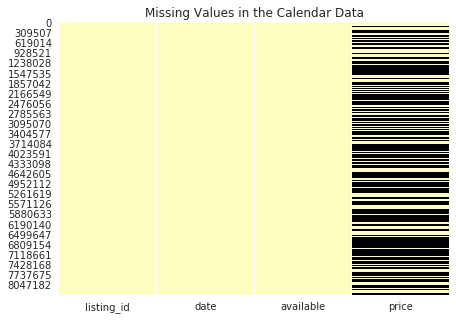

In [36]:
#Heatmap showing the missing values in the date frame
plt.figure(figsize = (7,5))
sns.heatmap(data_calendar.isnull(), cmap = "magma_r", cbar = False)
plt.title("Missing Values in the Calendar Data")

The only data missing in the data frame are the price values for nights where certain listings are not available. 

At a later point it may make sense to imput the price for the listing, using the average price given for the specific listing of interest. That being said, the date for which the listing is avaliable will most likely have a srong influence on the price, as Melbourne is a very popular tourist city, meaning that we should expect to see some seasonality in the prices.

I'll be adding a month variable to the data frame, to better review any seasonality in the data set.

In [37]:
#creating month variable
data_calendar["month"] = [date.month for date in data_calendar["date"]]

Text(0, 0.5, '% of Listing Available')

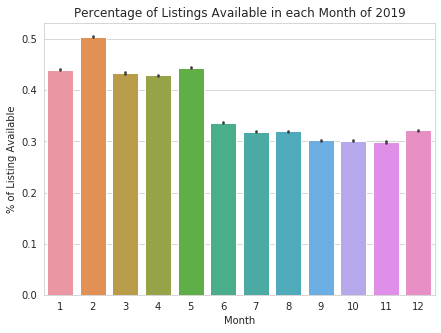

In [38]:
#Bar plot of % of available listing versus the month
plt.figure(figsize = (7,5))
sns.barplot(data_calendar["month"], data_calendar["available"])
plt.title("Percentage of Listings Available in each Month of 2019")
plt.xlabel("Month")
plt.ylabel("% of Listing Available")

Text(0, 0.5, 'Month of the Year')

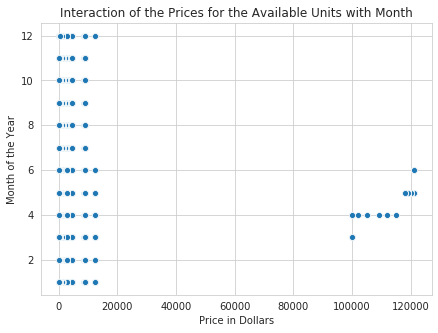

In [39]:
#Scatter plot of prices by month
plt.figure(figsize = (7,5))
sns.scatterplot(data_calendar.loc[data_calendar["available"] == True, "price"], data_calendar["month"])
plt.title("Interaction of the Prices for the Available Units with Month")
plt.xlabel("Price in Dollars")
plt.ylabel("Month of the Year")

Since there is a clear seperation in what appears to be a standard pattern of pricing, and a sudden emergence of a few very highly priced listings in the winter months (this is the southern hemisphere), lets look into these listings a little more closely.

In [40]:
data_calendar[data_calendar["price"] > 95000]["listing_id"].value_counts()

26284438    96
Name: listing_id, dtype: int64

In [41]:
data_calendar[(data_calendar["listing_id"] == 26284438) & (data_calendar["available"] == True)].groupby(data_calendar["month"])["price"].describe()

,count,unique,top,freq
month,,,,
3,31.0,1.0,100000.0,31.0
4,30.0,6.0,100000.0,25.0
5,31.0,4.0,119000.0,14.0
6,4.0,1.0,121000.0,4.0


There is only one listing which represents all of the high prices seen above. Additionally, this listing is only available in March - June, ie. all the high prices above are all of the available dates for this listing. I'm going to exclude this listing as an outlier in the data, as it appears to be someone's summer home, which they are listing for an exorbitant price durring the winter months.

In [42]:
#dropping outlier
outlier_ids = [26284438]
indexNames = data_calendar[data_calendar["listing_id"] == 26284438].index
data_calendar.drop(indexNames, inplace = True)

Now, lets review the monthly availabilities and the price distribution again.

Text(0, 0.5, '% of Listing Available')

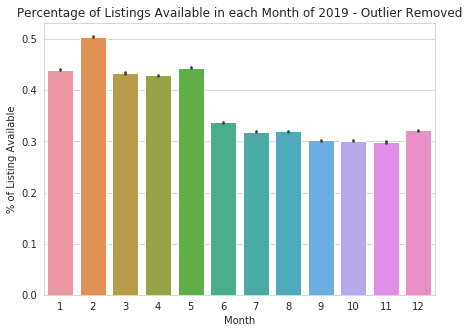

In [43]:
#Bar plot of % of listings available by month - No outlier
plt.figure(figsize = (7,5))
sns.barplot(data_calendar["month"], data_calendar["available"])
plt.title("Percentage of Listings Available in each Month of 2019 - Outlier Removed")
plt.xlabel("Month")
plt.ylabel("% of Listing Available")

Text(0, 0.5, 'Month of the Year')

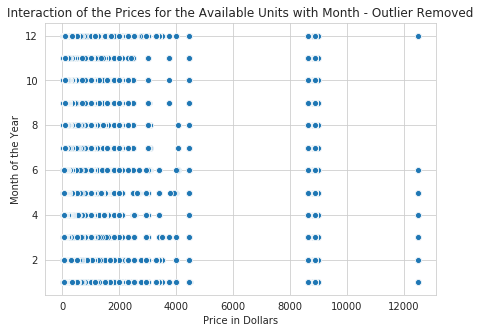

In [44]:
#Scatter plot of prices by month - no outlier
plt.figure(figsize = (7,5))
sns.scatterplot(data_calendar.loc[data_calendar["available"] == True, "price"], data_calendar["month"])
plt.title("Interaction of the Prices for the Available Units with Month - Outlier Removed")
plt.xlabel("Price in Dollars")
plt.ylabel("Month of the Year")

At first glance there appears to be three pricing classes into which the remaining listing fall. When one looks closer at which listings make up which brackets, it become clear, as shown below, that the highest prices shown here all belong to one listing - listing id 28112069. Additionally, these high prices represent the entirity of the available days for this listing in the year of 2019. Again we have what seems to be a summer home being listed on Airbnb during the off months. I will continue to review the other data sets before making a decision to remove this listing from the data set as an outlier or not.

The second highest bracket consists of four seperate listings. Listing ids:
* 16359110
* 22589975
* 22536466
* 22364351

These four listings are listed as being available for nearly the entire year of 2019 (365 days of availablity for listing 16359110, and 340 days of there other three). As they are being listed practically year round, I do not believe these are summer homes, and will continue to check on these listings as I merge the data sets. 

In [45]:
#All listings with a price above $12,000/night 
#and a count of how many time each listing appears
data_calendar[data_calendar["price"] > 12000]["listing_id"].value_counts()

28112069    177
Name: listing_id, dtype: int64

In [46]:
#Checking if the listing has any other available nights
#with a lower price
data_calendar[data_calendar["listing_id"] == 28112069].count()

listing_id    365
date          365
available     365
price         177
month         365
dtype: int64

In [47]:
#All listings with a price between $8,000 and $12,000 /night
#and a count of how many nights they have this price
data_calendar[(data_calendar["price"] < 12000) & (data_calendar["price"] >8000)]["listing_id"].value_counts()

16359110    365
22589975    340
22536466    340
22364351    340
Name: listing_id, dtype: int64

In [48]:
mid_range_listings = np.array(data_calendar[(data_calendar["price"] < 12000) & (data_calendar["price"] >8000)]["listing_id"].unique())

* * * 

### A Summary Data Frame of the Above Listings Data Frame - listings_summary_dec18.csv

This data frame contains a summary of the information provided in the previously analyzed listings data frame. Where the listings data frame contains 84 different variables, the summary data set only contains 16.

Of these 16, neighbourhood_group is 100% null, and will be dropped from the data frame. 

In [49]:
#dropping neighboorhood_group as it is 100% null
data_list_sum.drop(columns=["neighbourhood_group"], inplace=True)

In [50]:
#First 5 rows of data frame
data_list_sum.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,Manningham,-37.772684,145.092133,Private room,60,1,4,2015-09-12,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick,38901,Lindsay,Moreland,-37.766505,144.980736,Private room,35,3,108,2018-11-26,1.50,1,213
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,50121,Frank & Vince,Port Phillip,-37.859755,144.977369,Entire home/apt,159,3,15,2018-11-07,0.15,17,326
3,15246,Large private room-close to city,59786,Eleni,Darebin,-37.758971,144.989228,Private room,50,2,29,2017-05-15,0.30,3,0
4,16760,Melbourne BnB near City & Sports,65090,Colin,Port Phillip,-37.864530,144.992238,Private room,69,1,63,2018-11-22,0.74,1,328


In [51]:
data_list_sum.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Since some of the data types of the variables aren't applicable to the information described in the variable, I'll be altering them below before preforming any exploratory analysis.

In [52]:
#Converting Data Types

#neighbourhood to categorical
data_list_sum["neighbourhood"] = data_list_sum["neighbourhood"].astype("category")

#room type to categorical
data_list_sum["room_type"] = data_list_sum["room_type"].astype("category")

#last review to date
data_list_sum["last_review"] = pd.to_datetime(data_list_sum["last_review"])

Text(0, 0.5, 'Number of Listings')

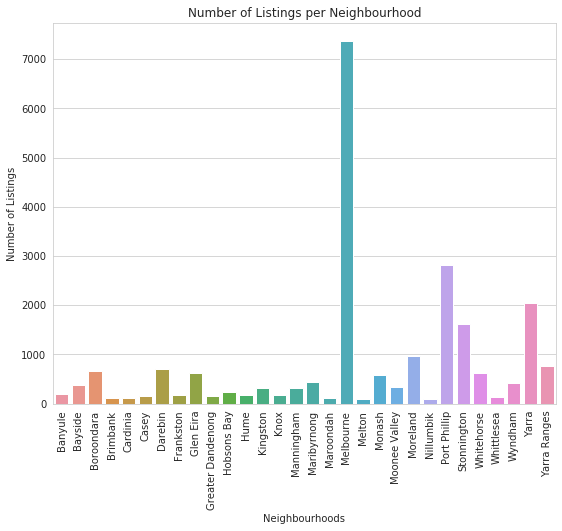

In [53]:
#Bar plot of Number of Listings by Neightborhood
plt.figure(figsize = (9,7))
sns.countplot(data_list_sum["neighbourhood"])
plt.title("Number of Listings per Neighbourhood")
plt.xticks(rotation = "vertical")
plt.xlabel("Neighbourhoods")
plt.ylabel("Number of Listings")

Based on the results of the above plot, I believe that the "Melbourne" neighbourhood is a catch-all or generalizer. Since there are twice as many neighbourhoods in the listing data frame shown above, and those neighbourhoods which are missing are those which are most commonly found in/near downtown Melbourne, that the levels of the neighbourhood feature have been colapsed.

Text(0.5, 0, 'Neighbourhood')

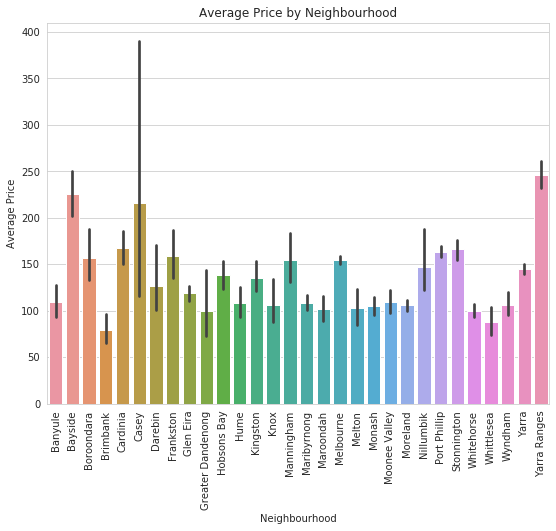

In [54]:
#Bar plot of average prices by neighbourhood
plt.figure(figsize = (9,7))
sns.barplot(data_list_sum["neighbourhood"], data_list_sum["price"])
plt.xticks(rotation = "vertical")
plt.title("Average Price by Neighbourhood")
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood")

In [55]:
#Summary statistics for the price of listings
#grouped over neighbourhood
data_list_sum["price"].groupby(data_list_sum["neighbourhood"]).describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Banyule,203.0,109.453202,131.003142,19.0,50.0,79.0,125.00,1400.0
Bayside,375.0,225.421333,234.668690,0.0,84.0,145.0,277.50,1501.0
Boroondara,664.0,157.072289,369.581661,0.0,60.0,90.0,148.50,8000.0
Brimbank,108.0,79.092593,85.724786,15.0,35.0,52.0,91.50,750.0
Cardinia,123.0,167.121951,104.910859,30.0,90.0,150.0,225.00,599.0
Casey,153.0,215.843137,1011.777651,18.0,50.0,76.0,150.00,12501.0
Darebin,698.0,126.458453,492.883055,12.0,50.0,80.0,120.00,12624.0
Frankston,177.0,158.632768,174.819373,24.0,71.0,108.0,180.00,1250.0
Glen Eira,631.0,118.541997,104.037986,14.0,55.0,86.0,150.00,980.0


* * *

### Detailed Review Data for the Melbourne listings - reviews_dec18.csv

This data provides detailed information on the review left for the listings in Melbourne. It includes information on the listing id, the review id, the date the review was left, the reviewer's id, the name of the reviewer (first name), and the comments made in the review.

In [56]:
#First 5 rows of data frame
data_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,9835,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...
3,9835,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...


In [57]:
data_reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [58]:
#Converting date to type datetime
data_reviews["date"] = pd.to_datetime(data_reviews["date"])